# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data

In [2]:
cars_prices = pd.read_csv("C:\\Users\\jyoth\\OneDrive\\Desktop\\Internshala\\Mechademy\\cars_price.csv", index_col="S.No.")
cars_prices.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
S.No.,,,,,,,,,,,,
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [3]:
cars_prices.shape

(40000, 12)

In [4]:
cars_prices.isna().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

In [5]:
cars_prices.isna().sum()/cars_prices.shape[0]

make                   0.000000
model                  0.000000
priceUSD               0.000000
year                   0.000000
condition              0.000000
mileage(kilometers)    0.000000
fuel_type              0.000000
volume(cm3)            0.000750
color                  0.000000
transmission           0.000000
drive_unit             0.033625
segment                0.093875
dtype: float64

Since the null values make up only a small percentage of the data records, they are dropped.

In [6]:
cars_prices.dropna(inplace=True)

In [7]:
cars_prices.shape

(35016, 12)

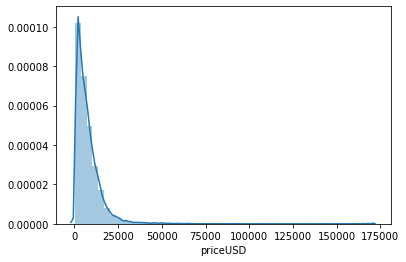

In [8]:
sns.distplot(cars_prices.priceUSD)

From the above plot, we see that the distribution of the car prices is right skewed. This means that a large proportion of the cars are sold at a price in the lower range. Only a few of the cars in the dataset are luxury cars.

In [9]:
cars_prices.corr()

,priceUSD,year,mileage(kilometers),volume(cm3)
priceUSD,1.000000,0.643067,-0.179098,0.268773
year,0.643067,1.000000,-0.245647,0.028499
mileage(kilometers),-0.179098,-0.245647,1.000000,0.019253
volume(cm3),0.268773,0.028499,0.019253,1.000000


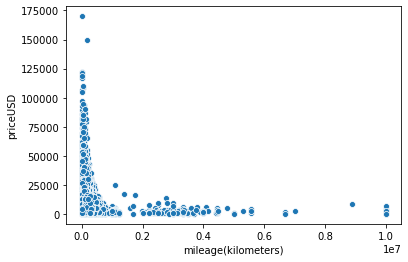

In [10]:
sns.scatterplot(data=cars_prices, x='mileage(kilometers)', y='priceUSD')

In [11]:
#Range of Mileage values
print("Max: ", cars_prices['mileage(kilometers)'].max())
print("Min: ", cars_prices['mileage(kilometers)'].min())

Max:  9999999.0
Min:  0.0


In [12]:
cars_prices[cars_prices['mileage(kilometers)']<50].shape

(327, 12)

In [13]:
#Range of Volume values
print("Max: ", cars_prices["volume(cm3)"].max())
print("Min: ", cars_prices["volume(cm3)"].min())

Max:  20000.0
Min:  500.0


In [14]:
cars_prices[cars_prices['volume(cm3)']<3000].shape

(30914, 12)

Using domain knowledge, the values of Mileage and Volume are absurd. Hence, the dataset was subsetted to only accomodate records that have normal values.

# Subsetting the dataset

In [15]:
subdf = cars_prices[(cars_prices['mileage(kilometers)']<50) & (cars_prices['volume(cm3)']<5000)]

In [16]:
subdf.shape

(322, 12)

In [17]:
subdf.columns

Index(['make', 'model', 'priceUSD', 'year', 'condition', 'mileage(kilometers)',
       'fuel_type', 'volume(cm3)', 'color', 'transmission', 'drive_unit',
       'segment'],
      dtype='object')

In [18]:
subdf.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
S.No.,,,,,,,,,,,,
229,opel,zafira,4450,2002,with mileage,0.0,diesel,2000.0,black,mechanics,front-wheel drive,M
342,volkswagen,golf,238,1987,for parts,1.0,petrol,1600.0,white,mechanics,front-wheel drive,C
402,renault,laguna,800,1995,with mileage,0.0,petrol,1800.0,gray,mechanics,front-wheel drive,D
766,bmw,6-seriya,78649,2019,with mileage,10.0,diesel,2993.0,black,auto,all-wheel drive,S
822,mitsubishi,space-wagon,500,1992,for parts,0.0,diesel,1800.0,burgundy,mechanics,front-wheel drive,M


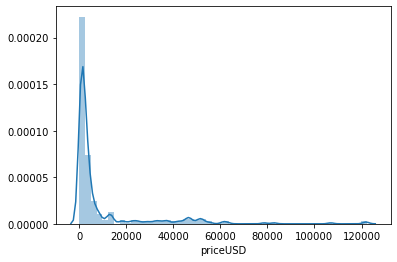

In [19]:
sns.distplot(subdf.priceUSD)

# Bivariate

In [20]:
def scatterplot(df,col):
    sns.scatterplot(data=df, x=col, y='priceUSD')
    plt.ylabel('priceUSD')
    plt.xlabel(col)
    plt.title('Boxplot for the column ' + col )
    plt.show()

In [21]:
def boxplot(df,col):
    sns.boxplot(x=col, y='priceUSD',data=df)
    plt.ylabel('priceUSD')
    plt.xlabel(col)
    plt.title('Boxplot for the column ' + col )
    plt.show()

In [22]:
def kde(df, col):
    df.groupby([col])['priceUSD'].plot.kde()
    plt.ylabel('Probability')
    plt.xlabel('Car Prices (in USD)')
    plt.title('KDE Plot for the column ' + col )
    plt.legend(labels=df[col].unique().tolist())
    plt.show()

In [23]:
def cat_bivar(df, col):
    print("Mean:")
    print(round(df.groupby([col])['priceUSD'].mean(), 2))
    print("Boxplot:")
    boxplot(df,col)
    print("KDE Plot:")
    kde(df, col)
    print("Kruskal-Wallis Test:")
    print(stats.kruskal(*[group["priceUSD"].values for name, group in df.groupby(col)]))    
    

### Mileage

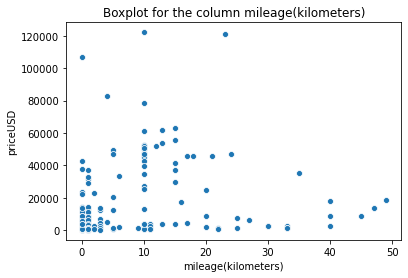

In [24]:
scatterplot(subdf, col='mileage(kilometers)')

In [25]:
subdf['Mileage_CI'] = pd.cut(subdf['mileage(kilometers)'],bins=7, labels=False)

<ipython-input-25-0cc6234540a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['Mileage_CI'] = pd.cut(subdf['mileage(kilometers)'],bins=7, labels=False)


In [26]:
subdf['Mileage_CI'].value_counts()

0    252
1     37
2     14
3      7
4      6
6      3
5      3
Name: Mileage_CI, dtype: int64

Mean:
Mileage_CI
0     5028.87
1    28231.59
2    30457.29
3    26494.43
4     7524.00
5     9696.67
6    13633.00
Name: priceUSD, dtype: float64
Boxplot:


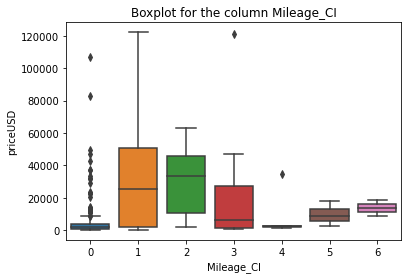

KDE Plot:


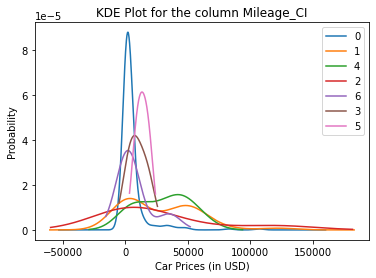

Kruskal-Wallis Test:
KruskalResult(statistic=52.183697958443275, pvalue=1.7127444414454228e-09)


In [27]:
cat_bivar(subdf, col="Mileage_CI")

To check if the car prices is affected by mileage, various plots were plotted and a Kruskal-Wallis test was conducted to see if the difference between the prices in each mileage CI is significant or not. 
The null hypothesis of Kruskal- Wallis test is that the sample mean of the car prices in each group (Mileage CI) is 0. 
Since the p-value is nearly 0, we can conclude that, the car prices are affected by Mileage. The same result can be drawn from the plots as well.

*CI - Class interval

## Volume (cm3)

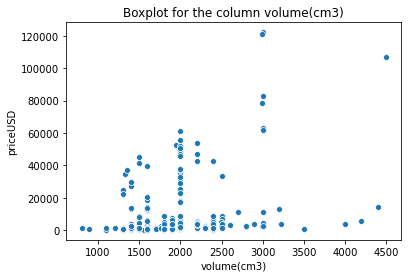

In [29]:
scatterplot(subdf, col='volume(cm3)')

In [40]:
subdf['Volume_CI'] = pd.cut(subdf['volume(cm3)'],bins=5, labels=False)

<ipython-input-40-c8dc9f87c8e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['Volume_CI'] = pd.cut(subdf['volume(cm3)'],bins=5, labels=False)


In [41]:
subdf['Volume_CI'].value_counts()

1    205
2     55
0     55
4      4
3      3
Name: Volume_CI, dtype: int64

Mean:
Volume_CI
0     6872.84
1     8408.43
2    14331.87
3     5836.67
4    32836.00
Name: priceUSD, dtype: float64
Boxplot:


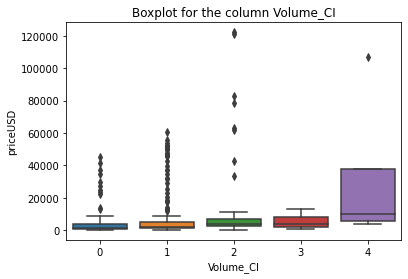

KDE Plot:


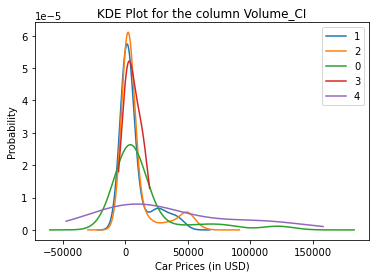

Kruskal-Wallis Test:
KruskalResult(statistic=22.600948655143164, pvalue=0.00015212066509818519)


In [42]:
cat_bivar(subdf, col="Volume_CI")

To check if the car prices is affected by volume, various plots were plotted and a Kruskal-Wallis test was conducted to see if the difference between the prices in each volume CI is significant or not. 
The null hypothesis of Kruskal- Wallis test is that the sample mean of the car prices in each group (Volume CI) is 0. 
Since the p-value is 0, we can conclude that the null hypothesis is rejected, i.e. the car prices are affected by Volume. The same inferences can be drawn from the plots as well.

*CI - Class interval

## Year of manufacture

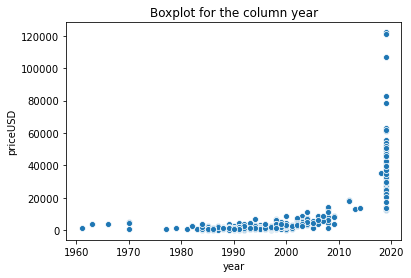

In [33]:
scatterplot(subdf,col='year')

In [37]:
subdf['Year_CI'] = pd.cut(subdf['year'],bins=5, labels=False)

<ipython-input-37-499b08e3d38f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['Year_CI'] = pd.cut(subdf['year'],bins=5, labels=False)


In [38]:
subdf['Year_CI'].value_counts()

3    138
2     97
4     69
1     12
0      6
Name: Year_CI, dtype: int64

Mean:
Year_CI
0     2949.67
1     1283.92
2     1322.93
3     2945.57
4    35810.48
Name: priceUSD, dtype: float64
Boxplot:


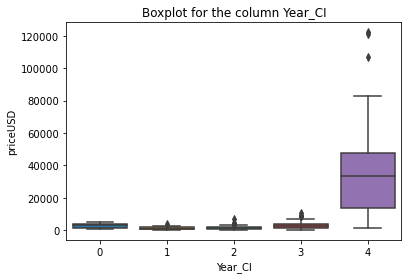

KDE Plot:


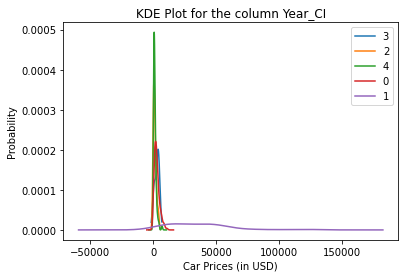

Kruskal-Wallis Test:
KruskalResult(statistic=189.13345951104202, pvalue=8.137627768562358e-40)


In [39]:
cat_bivar(subdf, col='Year_CI')

To check if the car prices is affected by the Year of manufacture, various plots were plotted and a Kruskal-Wallis test was conducted to see if the difference between the prices in each Year CI is significant or not. 
The null hypothesis of Kruskal- Wallis test is that the sample mean of the car prices in each group (Year CI) is 0. 
Since the p-value is 0, we can conclude that the null hypothesis is rejected, i.e. the car prices are affected by the Year of manufacture. The same inferences can be drawn from the plots as well.

*CI - Class interval